In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt
import params

In [2]:
# utils.compare_min_max()
dataset_edf = [utils.get_edf(params.PATIENTS[i]) for i in range(len(params.PATIENTS))]

Load .edf -> .\data\PSGData1_Hang7\20190917-T3-93135.edf
Extracting EDF parameters from E:\ZJU_Research\SR_ZJUPH_PSG\data\PSGData1_Hang7\20190917-T3-93135.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


E:\ZJU_Research\SR_ZJUPH_PSG\utils.py:28: RuntimeWarning: Physical range is not defined in following channels:
Thor, Abdo
  raw_train = mne.io.read_raw_edf(path)


Load .edf -> .\data\PSGData4_Hang7\20210702-T4-HC.edf
Extracting EDF parameters from E:\ZJU_Research\SR_ZJUPH_PSG\data\PSGData4_Hang7\20210702-T4-HC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


E:\ZJU_Research\SR_ZJUPH_PSG\utils.py:28: RuntimeWarning: Physical range is not defined in following channels:
Thor, Abdo
  raw_train = mne.io.read_raw_edf(path)


In [3]:
minset_set, maxset_set = [], []
for data in dataset_edf:
    minset, maxset = [], []
    for i in range(params.DIMENSION):
        print("Current i ->", i)
#         print(len(data[i][params.VALUE_IDX][0]))
        cur_min, cur_max = utils._get_min_and_max(utils._normalization(data[i][params.VALUE_IDX][0]))
#         print(np.shape(cur_min))
        minset.append(cur_min)
        maxset.append(cur_max)
    minset_set.append(minset)
    maxset_set.append(maxset)
print(np.shape(minset_set), np.shape(maxset_set))

Current i -> 0
Current i -> 1
Current i -> 2
Current i -> 3
Current i -> 4
Current i -> 5
Current i -> 6
Current i -> 7
Current i -> 8
Current i -> 9
Current i -> 10
Current i -> 11
Current i -> 12
Current i -> 13
Current i -> 14
Current i -> 15
Current i -> 16
Current i -> 17
Current i -> 18
Current i -> 19
Current i -> 20


E:\ZJU_Research\SR_ZJUPH_PSG\utils.py:51: RuntimeWarning: invalid value encountered in true_divide
  return (data_ori - min_v)/max_v


Current i -> 21
Current i -> 22
Current i -> 0
Current i -> 1
Current i -> 2
Current i -> 3
Current i -> 4
Current i -> 5
Current i -> 6
Current i -> 7
Current i -> 8
Current i -> 9
Current i -> 10
Current i -> 11
Current i -> 12
Current i -> 13
Current i -> 14
Current i -> 15
Current i -> 16
Current i -> 17
Current i -> 18
Current i -> 19
Current i -> 20
Current i -> 21
Current i -> 22
(2, 23) (2, 23)


In [4]:
# @static
def _plot_points(data_a, data_b, name):
    if len(data_a) != len(data_b):
        print("len(data_a) != len(data_b) Can not Polt! ( len a ->", len(data_a), "len b ->", len(data_b), ")")
        return None
    plt.figure(figsize=(20, 10))
    x = [i + 1 for i in range(len(data_a))]
    plt.plot(x, data_a, color='deeppink', marker='^', linewidth=0, markersize=42, alpha=0.7)
    plt.plot(x, data_b, color='green', marker='o', linewidth=0, markersize=42, alpha=0.7)
    for i in range(len(data_a)):
        point_a = [x[i], x[i]]
        point_b = [data_a[i], data_b[i]]
        plt.plot(point_a, point_b, color="deepskyblue")
        plt.plot([x[i]], [data_a[i]], color="deepskyblue", marker="s")
        plt.plot([x[i]], [data_b[i]], color="deepskyblue", marker="s")
    plt.title(name)
    plt.xlabel("Dimension")
    plt.ylabel("Value (Normalized)")
    plt.show()

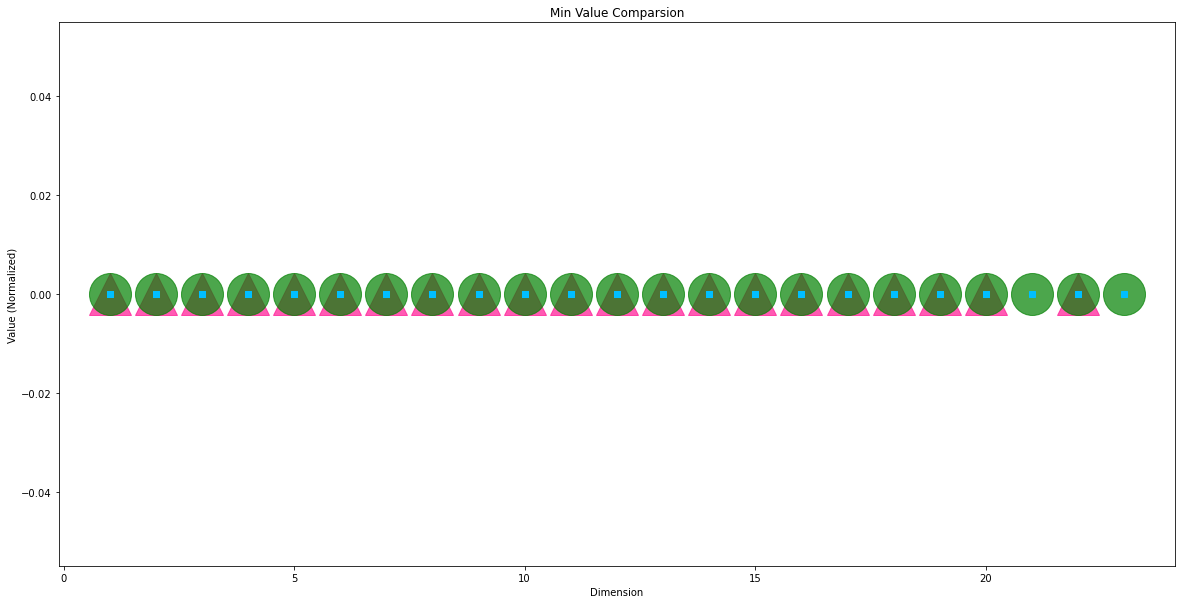

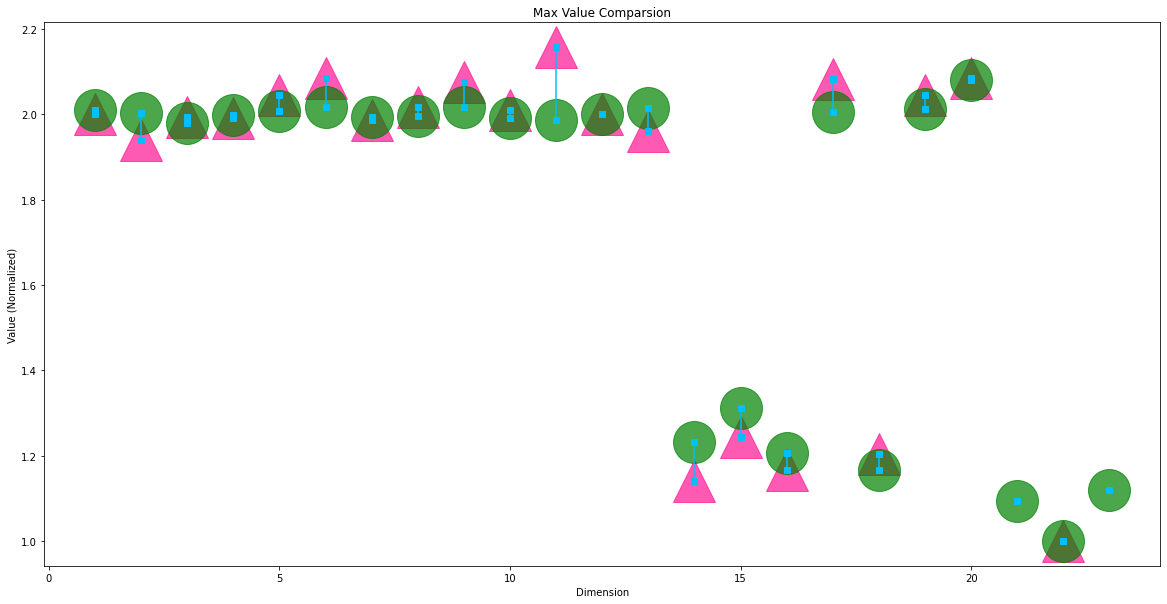

Comparsion in Min & Max Done!


In [5]:
if len(minset_set) == 2:
    """
    Currently We Only Have Two Patients
    """
    _plot_points(minset_set[0], minset_set[1], name="Min Value Comparsion")
    _plot_points(maxset_set[0], maxset_set[1], name="Max Value Comparsion")
    abs_min, abs_max = [np.abs(minset_set[0][i] - minset_set[1][i]) for i in range(len(minset_set[0]))], \
        [np.abs(maxset_set[0][i] - maxset_set[1][i]) for i in range(len(maxset_set[0]))]
    print("Comparsion in Min & Max Done!")
else:
    raise NotImplementedError